<a href="https://colab.research.google.com/github/trinhl/S4V_ASSIGNMENT/blob/master/S4V_Data_Science_Assignment_LE_KHANH_TRINH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deliverables:

1. Tell us about your dataset and the tool(s) you use to analyse it. Explain why you choose
them?
2. Show us the process you retrieve data, clean and manipulate data.
3. Show us your findings and reasonings lead to those findings.
4. Show us models/graphs that support your findings
5. What action would you recommend the government/policy makers (or any related
stakeholders of your choice) to take based on your findings above?

## 1.Tell us about your dataset and the tool(s) you use to analyse it. Explain why you choose them?

Dataset:


*   Tên: Revenue from Federal Sources for Public Elementary-Secondary School Systems: US and States: 2012 - 2018
*   Link: https://data.census.gov/cedsci/table?tid=GOVSTIMESERIES.GS00SS02&hidePreview=false
*   Miêu tả:
  *   Nguồn viện trợ giáo dục của Liên Bang.
  *   Viện trợ nhận được từ các nguồn việc trợ được coi là doanh thu.





Sau khi em xem qua các tập dataset trên Explore Census Data, và quyết định lựa chọn tập dataset này vì:


*   Có số lượng record không quá ít để có thể có phân tích.
*   Đi kèm với các cột có ý nghĩa phân tích vừa đủ.


## 2.Show us the process you retrieve data, clean and manipulate data.

In [18]:
# import các thư viện cần thiết
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# Đọc tập dataset
df = pd.read_csv('/gdrive/My Drive/datasets/GOVSTIMESERIES.GS00SS02_data_with_overlays_2020-09-09T090230.csv')

In [5]:
# Kiểm tra tổng quan dữ liệu
df.head()

,GEO_ID,NAME,GEO_ID_F,SVY_COMP,SVY_COMP_LABEL,YEAR,AGG_DESC,AGG_DESC_LABEL,GOVTYPE,GOVTYPE_LABEL,AMOUNT,AMOUNT_FORMATTED
0,id,Geographic Area Name,Geo Footnote,Survey Component,Survey Component,Year,Aggregate Description,Meaning of Aggregate Description,Type of Government,Type of Government,Amount,Amount Formatted
1,0400000US01,Alabama,NaN,06,Annual Survey of School System Finance,2012,FS,Elementary-secondary education school system r...,001,State and Local,789954.0,789954
2,0400000US01,Alabama,NaN,06,Annual Survey of School System Finance,2013,FS,Elementary-secondary education school system r...,001,State and Local,811739.0,811739
3,0400000US01,Alabama,NaN,06,Annual Survey of School System Finance,2014,FS,Elementary-secondary education school system r...,001,State and Local,794090.0,794090
4,0400000US01,Alabama,NaN,06,Annual Survey of School System Finance,2015,FS,Elementary-secondary education school system r...,001,State and Local,795238.0,795238


In [30]:
# Sau đó xóa dữ liệu ở hàng đầu tiên, vì đây là thông tin miêu tả cho cột dữ liệu
df = df.drop(0)

In [31]:
# Kiểm tra trùng lắp dữ liệu ở từng cột dữ liệu.
df.apply(lambda x: x.nunique())

GEO_ID                51
NAME                  51
GEO_ID_F               0
SVY_COMP               1
SVY_COMP_LABEL         1
YEAR                   7
AGG_DESC               9
AGG_DESC_LABEL         9
GOVTYPE                1
GOVTYPE_LABEL          1
AMOUNT              3100
AMOUNT_FORMATTED    3100
dtype: int64

### Tiến hành kiểm tra một vài trường dữ liệu, để biết được số lượng từng loại giá trị đang có.

In [32]:
df['YEAR'].value_counts()

2017    459
2012    459
2015    459
2016    459
2013    459
2018    459
2014    459
Name: YEAR, dtype: int64

In [33]:
df['AMOUNT'].value_counts()

0.0          63
2358.0        3
134412.0      2
19041.0       2
137544.0      2
             ..
257801.0      1
44954.0       1
1334427.0     1
129079.0      1
29998.0       1
Name: AMOUNT, Length: 3100, dtype: int64

In [34]:
df['AMOUNT_FORMATTED'].value_counts()

0          63
2358        3
28574       2
19041       2
41348       2
           ..
800525      1
848254      1
1857885     1
41482       1
147111      1
Name: AMOUNT_FORMATTED, Length: 3100, dtype: int64

### Kiểm tra các trị null, và tiến hành xử lý các giá trị null. Cùng với chuyển đổi kiểu dữ liệu cho phù hợp.

In [35]:
# Kiểm tra các trị null có ở từng cột.
df.isnull().sum()

GEO_ID                 0
NAME                   0
GEO_ID_F            3213
SVY_COMP               0
SVY_COMP_LABEL         0
YEAR                   0
AGG_DESC               0
AGG_DESC_LABEL         0
GOVTYPE                0
GOVTYPE_LABEL          0
AMOUNT                15
AMOUNT_FORMATTED      15
dtype: int64

In [24]:
# Tiền hành thay thế các trị string 'N' (null) bằng các giá trị NaN
df['AMOUNT'] = df['AMOUNT'].replace('N', np.nan)
df['AMOUNT_FORMATTED'] = df['AMOUNT_FORMATTED'].replace('N', np.nan)

In [11]:
df.describe()

,GEO_ID,NAME,GEO_ID_F,SVY_COMP,SVY_COMP_LABEL,YEAR,AGG_DESC,AGG_DESC_LABEL,GOVTYPE,GOVTYPE_LABEL,AMOUNT,AMOUNT_FORMATTED
count,3214,3214,1,3214,3214,3214,3214,3214,3214,3214,3199,3199
unique,52,52,1,2,2,8,10,10,2,2,3101,3101
top,0400000US56,Alaska,Geo Footnote,06,Annual Survey of School System Finance,2017,FSDSTOT,Elementary-secondary education school system r...,001,State and Local,0.0,0
freq,63,63,1,3213,3213,459,357,357,3213,3213,63,63


Nhận thấy rằng dữ liệu hiện vẫn toàn là kiểu object nên chưa thể dùng để phân tích được, nên tiến hành convert sang dạng Numeric

In [41]:
# Convert kiểu dữ liệu của các cột sau
df['YEAR'] = df['YEAR'].astype(np.int32)
df['AMOUNT'] = df['AMOUNT'].astype(np.float64)
df['AMOUNT_FORMATTED'] = df['AMOUNT_FORMATTED'].astype(np.float64)

In [37]:
# Tiến hành kiểm tra lại lần nữa
df.describe()

,YEAR,AMOUNT,AMOUNT_FORMATTED
count,3213.000000,3.198000e+03,3.198000e+03
mean,2015.000000,3.544193e+05,3.544193e+05
std,2.000311,7.746438e+05,7.746438e+05
min,2012.000000,0.000000e+00,0.000000e+00
25%,2013.000000,2.834350e+04,2.834350e+04
50%,2015.000000,1.202510e+05,1.202510e+05
75%,2017.000000,3.378582e+05,3.378582e+05
max,2018.000000,8.793325e+06,8.793325e+06


In [ ]:
df['AMOUNT'].dtype

dtype('float64')

In [ ]:
df.columns

Index(['GEO_ID', 'NAME', 'GEO_ID_F', 'SVY_COMP', 'SVY_COMP_LABEL', 'YEAR',
       'AGG_DESC', 'AGG_DESC_LABEL', 'GOVTYPE', 'GOVTYPE_LABEL', 'AMOUNT',
       'AMOUNT_FORMATTED'],
      dtype='object')

In [ ]:
df['AGG_DESC'].value_counts()

FS          357
FSDSCN      357
FSDSSE      357
FSDFAIA     357
FSDSTIT     357
FSDFATOT    357
FSDSON      357
FSDSTOT     357
FSDSV       357
Name: AGG_DESC, dtype: int64

## 3-4.Show us your findings and reasonings lead to those findings. && Show us models/graphs that support your findings

### Phân tích tổng quan tập dữ liệu

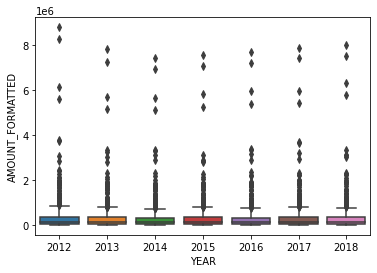

In [ ]:
# Sử dụng boxplot để kiểm tra outliner của doanh thu theo từng năm.
sns.boxplot(x="YEAR", y="AMOUNT_FORMATTED", data=df)

Nhận thấy phân bố dữ liệu khó để tìm được outliner, nên sẽ tiền hành lấy log cột *AMOUNT_FORMATTED*

In [43]:
# Loại ra những giá trị null hoặc bằng 0.0 để tránh ảnh hưởng đến phân tích.
df_outliner = df[(df['AMOUNT_FORMATTED'].isnull() == False) & (df['AMOUNT_FORMATTED'] != 0.0)][['AMOUNT_FORMATTED','YEAR', 'AGG_DESC', 'NAME']]
df_outliner['LOG_AMOUNT'] = np.log(df_outliner['AMOUNT_FORMATTED'])

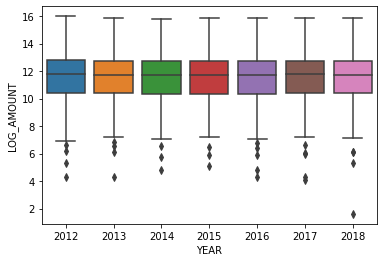

In [ ]:
# Kiểm tra lại boxplot
sns.boxplot(x="YEAR", y="LOG_AMOUNT", data=df_outliner)

Bây giờ biểu đồ đã dễ nhìn hơn để có thể tìm được outliner. Và có thể có nhận xét nhanh:


*   Mỗi năm giá trị *AMOUNT_FORMATTED* không có thay đổi.



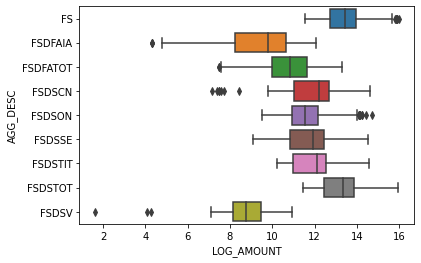

In [ ]:
# Kiểm tra lượng doanh thu ứng với mỗi loại viện trợ giáo dục.
sns.boxplot(x="LOG_AMOUNT", y="AGG_DESC", data=df_outliner)

Đã có sự khác biệt khi kiểm tra doanh thu theo từng loại viện trợ.



### Xác định outliner

In [39]:
# Xác định các ngưỡng lower bound và upper bound
def identify_outliner(value_arr):

  q1 = np.percentile(value_arr, 25)
  q3 = np.percentile(value_arr, 75)

  iqr = stats.iqr(value_arr)

  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)

  return [lower_bound, upper_bound]

In [40]:
# Trả về giá trị boolean đối với các trị.
def lambda_identify_outliner(value, outliner):

  if outliner[0] < value < outliner[1]:
    return False

  return True

### Tiến hành kiểm tra Outliner ở các loại viện trợ giáo dục

Chỉ kiểm tra các viện trợ có Outliner

#### Viện trợ FS

In [ ]:
df_FS = df_outliner[df_outliner['AGG_DESC'] == 'FS']
outliner_FS = identify_outliner(df_FS['LOG_AMOUNT'])
df_FS['is_outliner'] = df_FS['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FS))
df_FS[df_FS['is_outliner'] == True].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
253,8793325.0,2012,FS,California,15.989503,True
254,7836263.0,2013,FS,California,15.874273,True
255,7415061.0,2014,FS,California,15.819024,True
256,7556365.0,2015,FS,California,15.837901,True
257,7709079.0,2016,FS,California,15.857909,True
258,7889546.0,2017,FS,California,15.881049,True
259,7986209.0,2018,FS,California,15.893227,True


Đối với viện trợ FS thì thấy rằng Bang California nhận được viện trợ cao hơn so với mặt bằng chung của các bang khác rất nhiều.

#### Viện trợ FSDSCN

In [ ]:
df_FSDSCN = df_outliner[df_outliner['AGG_DESC'] == 'FSDSCN']
outliner_FSDSCN = identify_outliner(df_FSDSCN['LOG_AMOUNT'])
df_FSDSCN['is_outliner'] = df_FSDSCN['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FSDSCN))
df_FSDSCN[df_FSDSCN['is_outliner'] == True].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
1975,1777.0,2012,FSDSCN,New Mexico,7.482682,True
1976,1812.0,2013,FSDSCN,New Mexico,7.502186,True
1977,1583.0,2014,FSDSCN,New Mexico,7.367077,True
1978,4551.0,2015,FSDSCN,New Mexico,8.423102,True
1979,1951.0,2016,FSDSCN,New Mexico,7.576097,True
1980,2228.0,2017,FSDSCN,New Mexico,7.708860,True
1981,1303.0,2018,FSDSCN,New Mexico,7.172425,True


Bang New Mexico lại có mức doanh thu từ viện trợ FSDSCN thấp hơn mức trung bình liên tục từ 2012-2018.

#### Viện trợ FSDFAIA

In [ ]:
df_FSDFAIA = df_outliner[df_outliner['AGG_DESC'] == 'FSDFAIA']
outliner_FSDFAIA = identify_outliner(df_FSDFAIA['LOG_AMOUNT'])
df_FSDFAIA['is_outliner'] = df_FSDFAIA['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FSDFAIA))
df_FSDFAIA[df_FSDFAIA['is_outliner'] == True].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
2213,76.0,2012,FSDFAIA,Ohio,4.330733,True
2214,76.0,2013,FSDFAIA,Ohio,4.330733,True
2218,74.0,2017,FSDFAIA,Ohio,4.304065,True


Bang Ohio nhận được viện trợ không đồng đều giữa các năm.

#### Viện trợ FSDFATOT

In [ ]:
df_FSDFATOT = df_outliner[df_outliner['AGG_DESC'] == 'FSDFATOT']
outliner_FSDFATOT = identify_outliner(df_FSDFATOT['LOG_AMOUNT'])
df_FSDFATOT['is_outliner'] = df_FSDFATOT['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FSDFATOT))
df_FSDFATOT[df_FSDFATOT['is_outliner'] == True].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
2538,1798.0,2015,FSDFATOT,South Carolina,7.494430,True
2541,1808.0,2018,FSDFATOT,South Carolina,7.499977,True


Bang South Carolina chỉ có 2 năm trong khoảng 2012-2018 lại nhận được viện trợ thấp.

#### Viện trợ FSDSON

In [44]:
df_FSDSON = df_outliner[df_outliner['AGG_DESC'] == 'FSDSON']
outliner_FSDSON = identify_outliner(df_FSDSON['LOG_AMOUNT'])
df_FSDSON['is_outliner'] = df_FSDSON['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FSDSON))
df_FSDSON[df_FSDSON['is_outliner'] == True].head(30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
281,2392247.0,2012,FSDSON,California,14.687744,True
282,1532671.0,2013,FSDSON,California,14.242523,True
283,1354306.0,2014,FSDSON,California,14.118800,True
284,1343922.0,2015,FSDSON,California,14.111103,True
285,1379902.0,2016,FSDSON,California,14.137523,True
286,1334427.0,2017,FSDSON,California,14.104013,True
287,1388580.0,2018,FSDSON,California,14.143792,True
2738,1831535.0,2012,FSDSON,Texas,14.420665,True
2742,1309577.0,2016,FSDSON,Texas,14.085215,True
2743,1303745.0,2017,FSDSON,Texas,14.080751,True


*   Bang California nhận được cao hơn so với mặt bằng chung của các bang khác rất nhiều liên tục từ năm 2012-2018.
*   Bên cạnh đó bang Texas cũng sự cao khác biệt so với các bang khác liên tục 3 năm từ 2016-2018.

#### Viện trợ FSDSV

In [ ]:
df_FSDSV = df_outliner[df_outliner['AGG_DESC'] == 'FSDSV']
outliner_FSDSV = identify_outliner(df_FSDSV['LOG_AMOUNT'])
df_FSDSV['is_outliner'] = df_FSDSV['LOG_AMOUNT'].apply(lambda x: lambda_identify_outliner(x, outliner_FSDSV))
df_FSDSV[df_FSDSV['is_outliner'] == True].head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMOUNT_FORMATTED,YEAR,AGG_DESC,NAME,LOG_AMOUNT,is_outliner
2016,5.0,2018,FSDSV,New Mexico,1.609438,True
2203,73.0,2016,FSDSV,North Dakota,4.290459,True
2204,58.0,2017,FSDSV,North Dakota,4.060443,True


Mức viện trợ mà Bang New Mexico nhận được ở năm 2016 rất thấp, có thể coi là thấp nhất ở các loại viện trợ.

### Doanh thu theo từng năm

In [ ]:
df_year_agg = df.groupby(['YEAR', 'AGG_DESC'], as_index=False).agg({"AMOUNT_FORMATTED": "sum"})
df_year_agg.columns = ['YEAR', 'AGG_DESC', 'TOTAL_AMOUNT_FORMATTED']

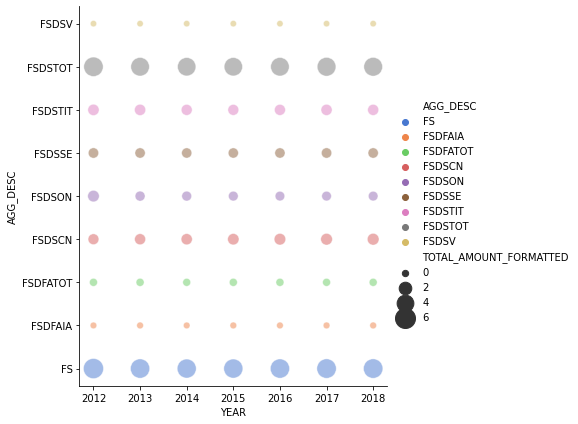

In [ ]:
sns.relplot(x="YEAR", y="AGG_DESC", hue="AGG_DESC", size="TOTAL_AMOUNT_FORMATTED",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_year_agg)

Mức viện trợ của từng quỹ qua năm mỗi năm gần như không thay đổi.

### Tổng kết

- Thấy rằng California liên tục từ năm 2012 đến 2018 đều nhận được đầu tư vượt mức ở các viện trợ FS, FSDSON. 
- Về phía bang New Mexico là bang được ghi nhận có mức đầu thấp nhất từ quỹ FSDSV, cũng là mức thấp nhất mà một quỹ đầu tư vào năm 2016. Và là Bang có mức lợi nhuận thấp liên tục qua các năm 2012 - 2018 từ quỹ FSDSCN.


## 5.What action would you recommend the government/policy makers (or any related stakeholders of your choice) to take based on your findings above?

Chỉ với dữ liệu ở tập dataset có thể đưa những nhận định sau:


*   Cần tìm hiểu nguyên nhân dẫn đến:

  *   New Mexico: bang liên tục nhận được mức viện trợ thấp, và cũng là bang ghi nhận có mức viện trợ thấp nhất.
  *   California: Điều gì khiến bang này nhận được sự thu hút từ các nguồn viện trợ.

*   Nguồn vốn viện trợ không thay đổi qua từng năm.

